In [33]:
# import scipy.io
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import plot_velocity_fields, plot_velocity_magnitude_only


Re = 7500

start_idx = 0
steady_state = np.load(f"mesh_validation/Re{Re}_mesh_validation_2/run1/U0_field_data.npy").squeeze()
V_coords = np.load(f"mesh_validation/Re{Re}_mesh_validation_2/run1/V_dof_coordinates.npy")

Grid resolution: 200x200
Domain: x=[0.000, 1.000], y=[0.000, 1.000]
Snapshot: -1


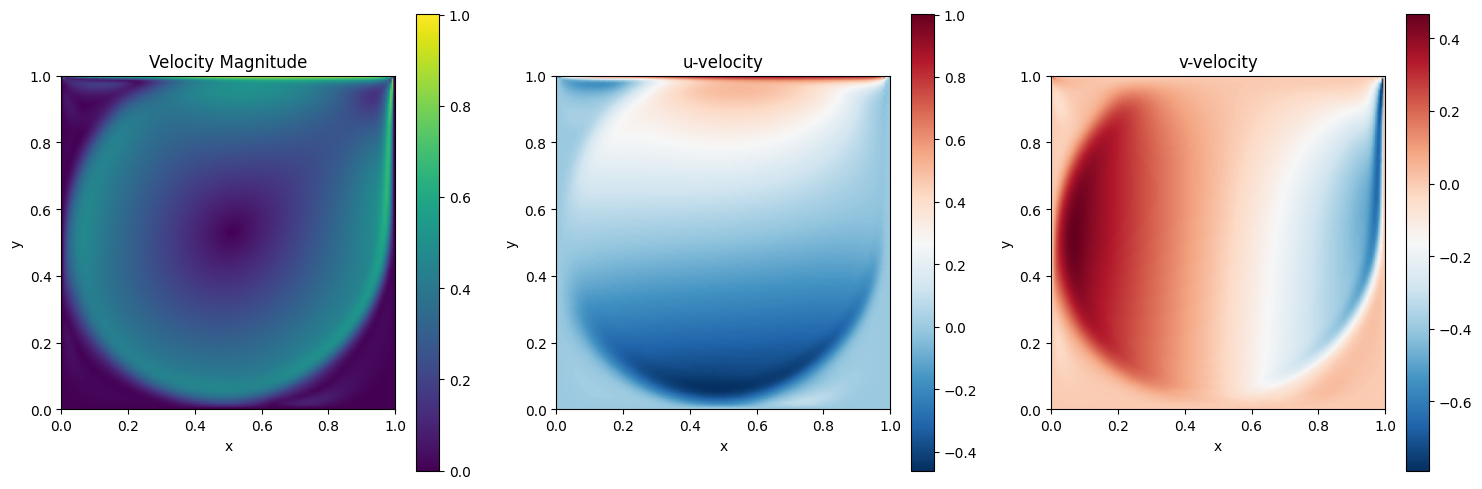

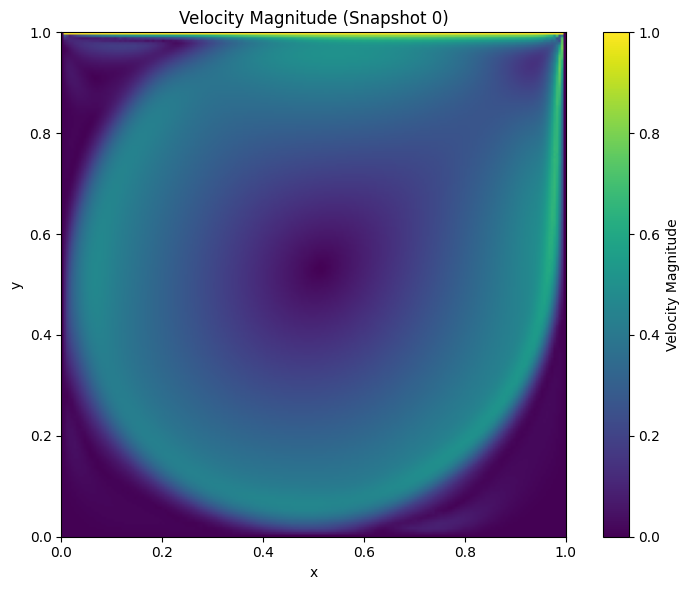

In [35]:
# In your notebook
import numpy as np
from pathlib import Path
from plot_utils import plot_velocity_fields, plot_velocity_magnitude_only

# Plot all three velocity fields
fig, axes = plot_velocity_fields(steady_state, V_coords, snapshot_idx=-1)
plt.show()

# # Or plot just velocity magnitude
fig, ax = plot_velocity_magnitude_only(steady_state, V_coords, snapshot_idx=0)
# plt.show()

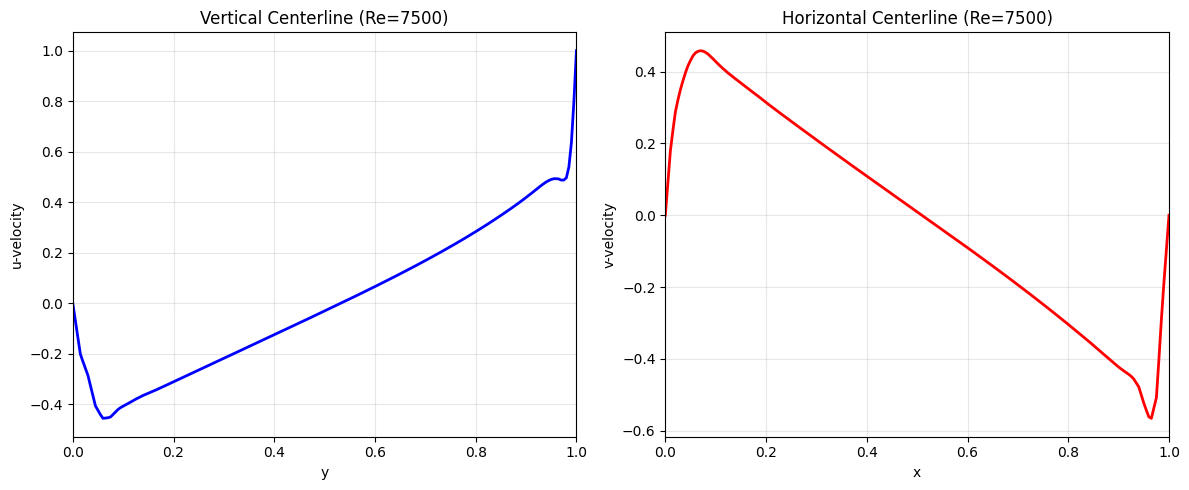

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def extract_centerlines(U_data, V_coords, n_points=101):
    """Extract centerline velocities for lid-driven cavity"""
    
    # Handle data shape and extract u,v components
    U_snapshot = U_data if U_data.ndim == 1 else U_data[:, 0]
    u_vals = U_snapshot[0::2]
    v_vals = U_snapshot[1::2]
    coords = V_coords[0::2, :]
    
    # Get domain bounds
    x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
    y_min, y_max = coords[:, 1].min(), coords[:, 1].max()
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    
    # Vertical centerline points (x=center, varying y)
    vert_y = np.linspace(y_min, y_max, n_points)
    vert_points = np.column_stack([np.full(n_points, x_center), vert_y])
    
    # Horizontal centerline points (y=center, varying x)
    horiz_x = np.linspace(x_min, x_max, n_points)
    horiz_points = np.column_stack([horiz_x, np.full(n_points, y_center)])
    
    # Interpolate velocities
    u_vert = griddata(coords, u_vals, vert_points, method='linear')
    v_horiz = griddata(coords, v_vals, horiz_points, method='linear')
    
    return {
        'vertical': {'y_norm': vert_y, 'u': u_vert},
        'horizontal': {'x_norm': horiz_x, 'v': v_horiz}
    }

def plot_centerlines(centerline_data, Re=None):
    """Plot centerline velocities"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Vertical centerline: y vs u-velocity
    axes[0].plot(centerline_data['vertical']['y_norm'], 
                 centerline_data['vertical']['u'], 
                 'b-', linewidth=2)
    axes[0].set_xlabel('y')
    axes[0].set_ylabel('u-velocity')
    axes[0].set_title(f'Vertical Centerline (Re={Re})' if Re else 'Vertical Centerline')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(0, 1)
    
    # Horizontal centerline: x vs v-velocity
    axes[1].plot(centerline_data['horizontal']['x_norm'],
                 centerline_data['horizontal']['v'], 
                 'r-', linewidth=2)
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('v-velocity')
    axes[1].set_title(f'Horizontal Centerline (Re={Re})' if Re else 'Horizontal Centerline')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(0, 1)
    
    plt.tight_layout()
    return fig, axes

# Usage
centerlines = extract_centerlines(steady_state, V_coords, n_points=201)
fig, axes = plot_centerlines(centerlines, Re=Re)
plt.show()

✓ Loaded mesh validation case 1
✓ Loaded mesh validation case 2
✓ Loaded mesh validation case 3
✓ Loaded mesh validation case 4


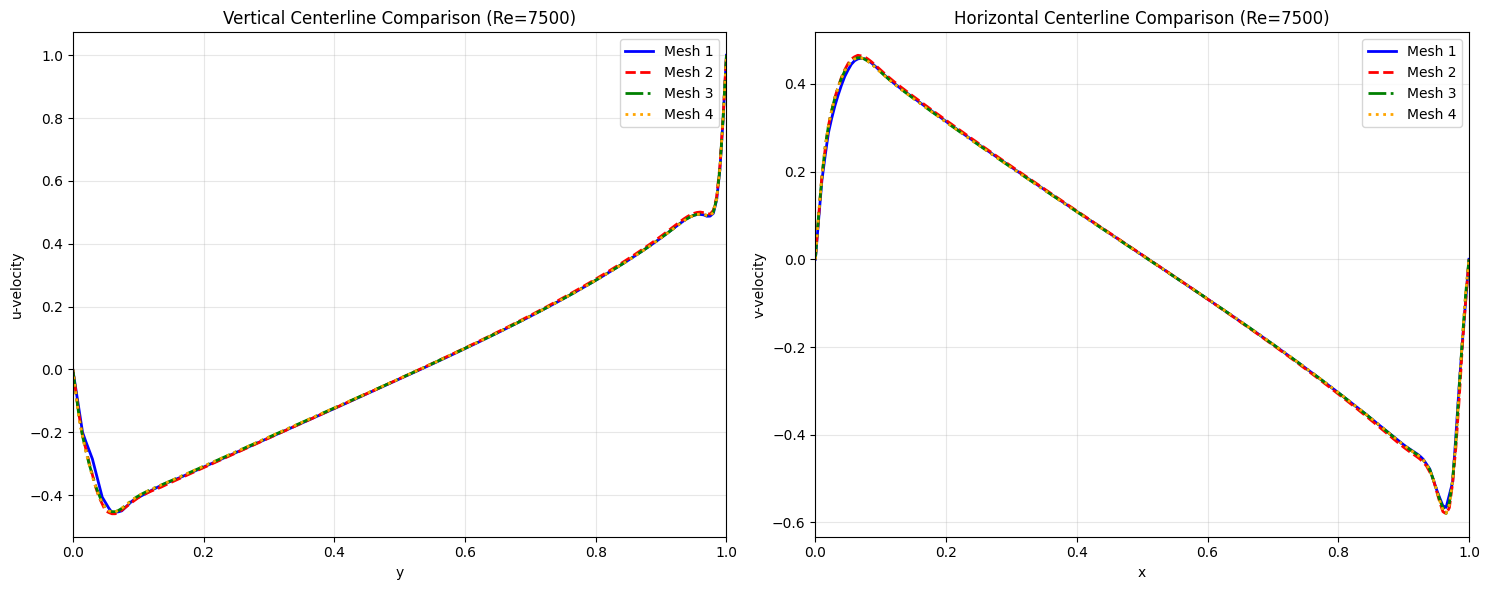


Mesh Convergence Analysis for Re=7500
Successfully loaded 4 mesh cases

Key velocity values at y = 0.5 (vertical centerline):
Mesh 1: u = -0.030819
Mesh 2: u = -0.029634
Mesh 3: u = -0.029433
Mesh 4: u = -0.029340

Key velocity values at x = 0.5 (horizontal centerline):
Mesh 1: v = 0.009803
Mesh 2: v = 0.010118
Mesh 3: v = 0.009349
Mesh 4: v = 0.009487


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def extract_centerlines(U_data, V_coords, n_points=101):
    """Extract centerline velocities for lid-driven cavity"""
    
    # Handle data shape and extract u,v components
    U_snapshot = U_data if U_data.ndim == 1 else U_data[:, 0]
    u_vals = U_snapshot[0::2]
    v_vals = U_snapshot[1::2]
    coords = V_coords[0::2, :]
    
    # Get domain bounds
    x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
    y_min, y_max = coords[:, 1].min(), coords[:, 1].max()
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    
    # Vertical centerline points (x=center, varying y)
    vert_y = np.linspace(y_min, y_max, n_points)
    vert_points = np.column_stack([np.full(n_points, x_center), vert_y])
    
    # Horizontal centerline points (y=center, varying x)
    horiz_x = np.linspace(x_min, x_max, n_points)
    horiz_points = np.column_stack([horiz_x, np.full(n_points, y_center)])
    
    # Interpolate velocities
    u_vert = griddata(coords, u_vals, vert_points, method='linear')
    v_horiz = griddata(coords, v_vals, horiz_points, method='linear')
    
    return {
        'vertical': {'y_norm': vert_y, 'u': u_vert},
        'horizontal': {'x_norm': horiz_x, 'v': v_horiz}
    }

# Load and process all mesh validation cases
mesh_cases = {}
colors = ['blue', 'red', 'green', 'orange', 'purple']
linestyles = ['-', '--', '-.', ':', '-']

for i in range(1, 5):
    try:
        # Load data
        steady_state_i = np.load(f"mesh_validation/Re{Re}_mesh_validation_{i}/run1/U0_field_data.npy").squeeze()
        V_coords_i = np.load(f"mesh_validation/Re{Re}_mesh_validation_{i}/run1/V_dof_coordinates.npy")
        
        # Extract centerlines
        centerlines_i = extract_centerlines(steady_state_i, V_coords_i, n_points=201)
        
        # Store results
        mesh_cases[f'mesh_{i}'] = {
            'centerlines': centerlines_i,
            'color': colors[i-1],
            'linestyle': linestyles[i-1],
            'label': f'Mesh {i}'
        }
        
        print(f"✓ Loaded mesh validation case {i}")
        
    except FileNotFoundError:
        print(f"❌ Mesh validation case {i} not found")
        continue

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot vertical centerlines
for case_name, case_data in mesh_cases.items():
    centerlines = case_data['centerlines']
    axes[0].plot(centerlines['vertical']['y_norm'], 
                 centerlines['vertical']['u'],
                 color=case_data['color'],
                 linestyle=case_data['linestyle'],
                 linewidth=2,
                 label=case_data['label'])

axes[0].set_xlabel('y')
axes[0].set_ylabel('u-velocity')
axes[0].set_title(f'Vertical Centerline Comparison (Re={Re})')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 1)
axes[0].legend()

# Plot horizontal centerlines
for case_name, case_data in mesh_cases.items():
    centerlines = case_data['centerlines']
    axes[1].plot(centerlines['horizontal']['x_norm'],
                 centerlines['horizontal']['v'],
                 color=case_data['color'],
                 linestyle=case_data['linestyle'],
                 linewidth=2,
                 label=case_data['label'])

axes[1].set_xlabel('x')
axes[1].set_ylabel('v-velocity')
axes[1].set_title(f'Horizontal Centerline Comparison (Re={Re})')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 1)
axes[1].legend()

plt.tight_layout()
plt.show()

# Print mesh convergence info
print(f"\nMesh Convergence Analysis for Re={Re}")
print("="*50)
print(f"Successfully loaded {len(mesh_cases)} mesh cases")

# Calculate some key values for comparison
if len(mesh_cases) > 1:
    print("\nKey velocity values at y = 0.5 (vertical centerline):")
    for case_name, case_data in mesh_cases.items():
        centerlines = case_data['centerlines']
        # Find value closest to y = 0.5
        idx_mid = np.argmin(np.abs(centerlines['vertical']['y_norm'] - 0.5))
        u_mid = centerlines['vertical']['u'][idx_mid]
        print(f"{case_data['label']}: u = {u_mid:.6f}")
    
    print("\nKey velocity values at x = 0.5 (horizontal centerline):")
    for case_name, case_data in mesh_cases.items():
        centerlines = case_data['centerlines']
        # Find value closest to x = 0.5
        idx_mid = np.argmin(np.abs(centerlines['horizontal']['x_norm'] - 0.5))
        v_mid = centerlines['horizontal']['v'][idx_mid]
        print(f"{case_data['label']}: v = {v_mid:.6f}")

✓ Loaded mesh validation case 1
✓ Loaded mesh validation case 2
✓ Loaded mesh validation case 3
✓ Loaded mesh validation case 4


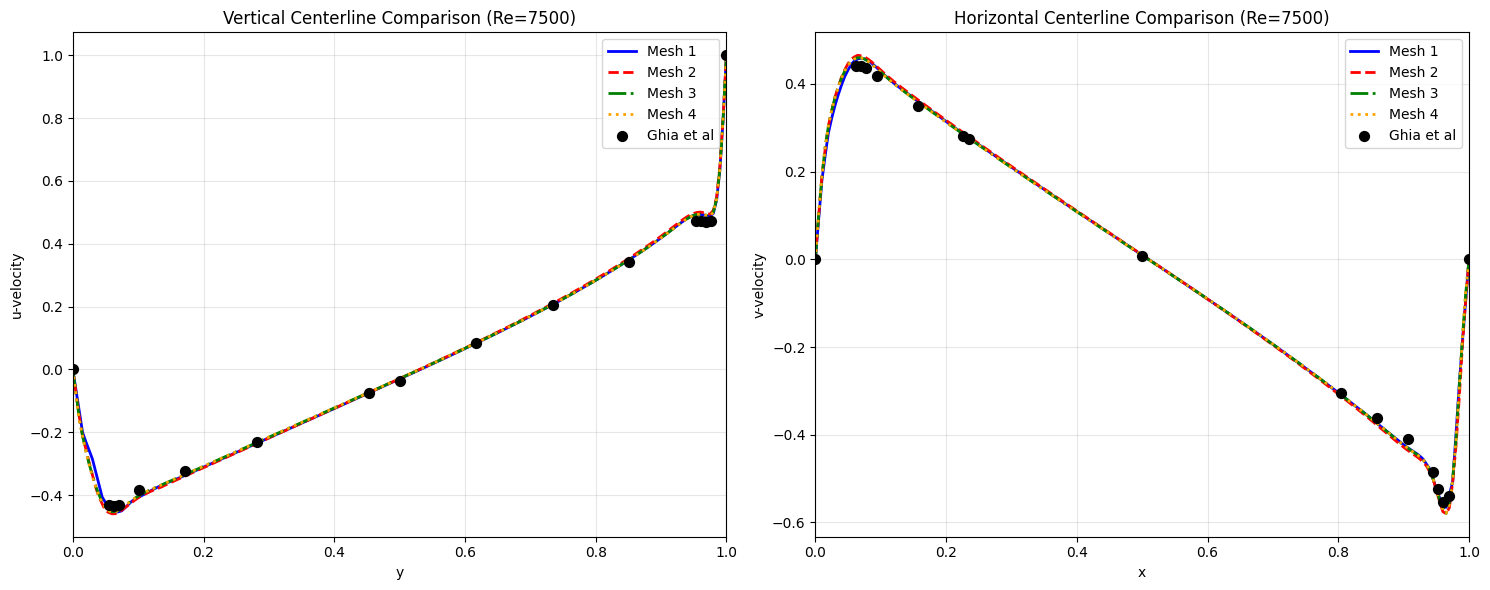


Mesh Convergence Analysis for Re=7500
Successfully loaded 4 mesh cases

Key velocity values at y = 0.5 (vertical centerline):
Mesh 1: u = -0.030819
Mesh 2: u = -0.029634
Mesh 3: u = -0.029433
Mesh 4: u = -0.029340
Ghia et al: u = -0.038000

Key velocity values at x = 0.5 (horizontal centerline):
Mesh 1: v = 0.009803
Mesh 2: v = 0.010118
Mesh 3: v = 0.009349
Mesh 4: v = 0.009487
Ghia et al: v = 0.008240


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def extract_centerlines(U_data, V_coords, n_points=101):
    """Extract centerline velocities for lid-driven cavity"""
    
    # Handle data shape and extract u,v components
    U_snapshot = U_data if U_data.ndim == 1 else U_data[:, 0]
    u_vals = U_snapshot[0::2]
    v_vals = U_snapshot[1::2]
    coords = V_coords[0::2, :]
    
    # Get domain bounds
    x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
    y_min, y_max = coords[:, 1].min(), coords[:, 1].max()
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    
    # Vertical centerline points (x=center, varying y)
    vert_y = np.linspace(y_min, y_max, n_points)
    vert_points = np.column_stack([np.full(n_points, x_center), vert_y])
    
    # Horizontal centerline points (y=center, varying x)
    horiz_x = np.linspace(x_min, x_max, n_points)
    horiz_points = np.column_stack([horiz_x, np.full(n_points, y_center)])
    
    # Interpolate velocities
    u_vert = griddata(coords, u_vals, vert_points, method='linear')
    v_horiz = griddata(coords, v_vals, horiz_points, method='linear')
    
    return {
        'vertical': {'y_norm': vert_y, 'u': u_vert},
        'horizontal': {'x_norm': horiz_x, 'v': v_horiz}
    }

# Literature data placeholders - replace with actual data
# Vertical centerline data (y, u-velocity)
lit_y_norm = np.array([1.0, 0.9766, 0.9688, 0.9609 , 0.9531, 0.8516, 0.7344, 0.6172, 0.5, 0.4531, 0.2813, 0.1719, 0.1016, 0.0703, 0.0625, 0.0547, 0.0])
lit_u = np.array([1.0, 0.47244, 0.47048, 0.47323, 0.47167, 0.34228, 0.20591, 0.08342, -0.038, -0.07503 , -0.23176, -0.32393, -0.38324, -0.43025, -0.43590, -0.43154, 0.0])

# Horizontal centerline data (x, v-velocity)  
lit_x_norm = np.array([1.0, 0.9688, 0.9609, 0.9531, 0.9453, 0.9063, 0.8594, 0.8047, 0.5, 0.2344, 0.2266, 0.1563, 0.0938, 0.0781, 0.0703, 0.0625, 0.0])
lit_v = np.array([0.0, -0.53858, -0.55216, -0.52347, -0.48590, -0.41050, -0.36213, -0.30448, 0.00824, 0.27348, 0.28117, 0.35060, 0.41824, 0.43564, 0.44030, 0.43979 , 0.0])

# Load and process all mesh validation cases
mesh_cases = {}
colors = ['blue', 'red', 'green', 'orange', 'purple']
linestyles = ['-', '--', '-.', ':', '-']

for i in range(1, 5):
    try:
        # Load data
        steady_state_i = np.load(f"mesh_validation/Re{Re}_mesh_validation_{i}/run1/U0_field_data.npy").squeeze()
        V_coords_i = np.load(f"mesh_validation/Re{Re}_mesh_validation_{i}/run1/V_dof_coordinates.npy")
        
        # Extract centerlines
        centerlines_i = extract_centerlines(steady_state_i, V_coords_i, n_points=201)
        
        # Store results
        mesh_cases[f'mesh_{i}'] = {
            'centerlines': centerlines_i,
            'color': colors[i-1],
            'linestyle': linestyles[i-1],
            'label': f'Mesh {i}'
        }
        
        print(f"✓ Loaded mesh validation case {i}")
        
    except FileNotFoundError:
        print(f"❌ Mesh validation case {i} not found")
        continue

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot vertical centerlines
for case_name, case_data in mesh_cases.items():
    centerlines = case_data['centerlines']
    axes[0].plot(centerlines['vertical']['y_norm'], 
                 centerlines['vertical']['u'],
                 color=case_data['color'],
                 linestyle=case_data['linestyle'],
                 linewidth=2,
                 label=case_data['label'])

# Add literature data for vertical centerline
axes[0].scatter(lit_y_norm, lit_u, 
                color='black', marker='o', s=50, 
                label='Ghia et al', zorder=10)

axes[0].set_xlabel('y')
axes[0].set_ylabel('u-velocity')
axes[0].set_title(f'Vertical Centerline Comparison (Re={Re})')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 1)
axes[0].legend()

# Plot horizontal centerlines
for case_name, case_data in mesh_cases.items():
    centerlines = case_data['centerlines']
    axes[1].plot(centerlines['horizontal']['x_norm'],
                 centerlines['horizontal']['v'],
                 color=case_data['color'],
                 linestyle=case_data['linestyle'],
                 linewidth=2,
                 label=case_data['label'])

# Add literature data for horizontal centerline
axes[1].scatter(lit_x_norm, lit_v,
                color='black', marker='o', s=50,
                label='Ghia et al', zorder=10)

axes[1].set_xlabel('x')
axes[1].set_ylabel('v-velocity')
axes[1].set_title(f'Horizontal Centerline Comparison (Re={Re})')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 1)
axes[1].legend()

plt.tight_layout()
plt.show()

# Print mesh convergence info
print(f"\nMesh Convergence Analysis for Re={Re}")
print("="*50)
print(f"Successfully loaded {len(mesh_cases)} mesh cases")

# Calculate some key values for comparison
if len(mesh_cases) > 1:
    print("\nKey velocity values at y = 0.5 (vertical centerline):")
    for case_name, case_data in mesh_cases.items():
        centerlines = case_data['centerlines']
        # Find value closest to y = 0.5
        idx_mid = np.argmin(np.abs(centerlines['vertical']['y_norm'] - 0.5))
        u_mid = centerlines['vertical']['u'][idx_mid]
        print(f"{case_data['label']}: u = {u_mid:.6f}")
    
    # Add literature comparison
    lit_idx_mid = np.argmin(np.abs(lit_y_norm - 0.5))
    print(f"Ghia et al: u = {lit_u[lit_idx_mid]:.6f}")
    
    print("\nKey velocity values at x = 0.5 (horizontal centerline):")
    for case_name, case_data in mesh_cases.items():
        centerlines = case_data['centerlines']
        # Find value closest to x = 0.5
        idx_mid = np.argmin(np.abs(centerlines['horizontal']['x_norm'] - 0.5))
        v_mid = centerlines['horizontal']['v'][idx_mid]
        print(f"{case_data['label']}: v = {v_mid:.6f}")
    
    # Add literature comparison
    lit_idx_mid = np.argmin(np.abs(lit_x_norm - 0.5))
    print(f"Ghia et al: v = {lit_v[lit_idx_mid]:.6f}")